## Pset4 Benjamin Zeisberg

In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [203]:
# Reading in the data
team = pd.read_csv('homework_4data_2023.csv')
player = pd.read_csv('transformed_data.csv')

In [204]:
# Dropping unlabeled columns
for i in player.columns[-9:]:
    player = player.drop(i, axis=1)

1. Use the data set provided with this homework and the Pythagorean Formula For Wins (as amended for basketball by Daryl Morey, with 14 as the exponent) to calculate how many wins the following players cost their team by virtue of their poor free throw shooting: Shaq, Dwight Howard, and Deandre Jordan.  What would have happened if they shot at a league average rate? These players’ statistics are in the first tab and their team-/league- level data are in the second tab!

In [230]:
combined.columns

Index(['Player', 'Season', 'Age', 'Tm', 'Lg', 'Pos', 'G', 'GS', 'MP', 'FG',
       'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT',
       'FTA', 'FT%', 'Year', 'Team', 'Sample', 'Tm.FT_Perc', 'GMS', 'W', 'L',
       'Tm.Pts', 'Opp.Pts', 'Pythagorean'],
      dtype='object')

In [205]:
player['Year'] = player['Season'].apply(lambda x: float(x.split('-')[0]))

In [207]:
combined = pd.merge(player, team, how='left', left_on=['Year', 'Tm'], right_on=['Year', 'Team'])
combined['Pythagorean'] = combined.apply(lambda x: (x['Tm.Pts']/x['Opp.Pts'])**14/((x['Tm.Pts']/x['Opp.Pts'])**14 +1), axis=1)


In [246]:
# Assuming the average 2point free throw is 65 percentage chance
combined['Predicted_FT_points'] = combined.apply(lambda x: np.round(x['FTA']*0.65) - x['FT'], axis=1)
combined['Scores_new'] = combined.apply(lambda x: x['Predicted_FT_points'] + x['Tm.Pts'], axis=1)
combined['Pythagorean_new'] = combined.apply(lambda x: (x['Scores_new']/x['Opp.Pts'])**14/((x['Scores_new']/x['Opp.Pts'])**14 +1), axis=1)

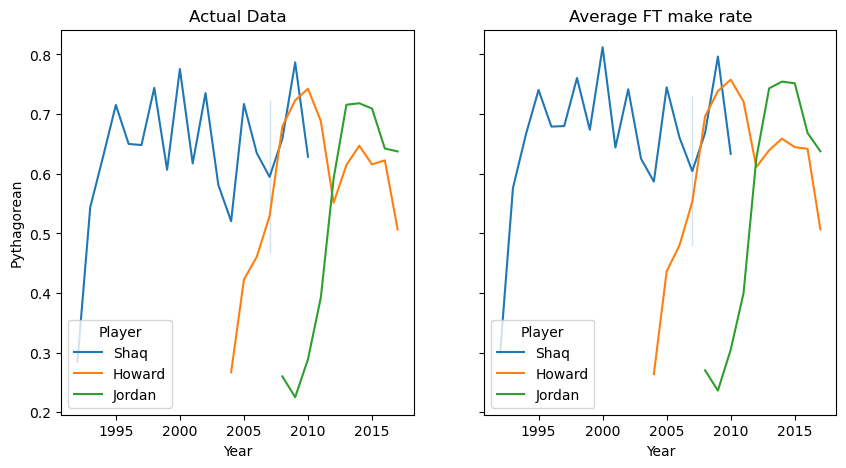

<Figure size 640x480 with 0 Axes>

In [248]:
fig, ax = plt.subplots(1,2, figsize=(10,5),sharey=True)
sns.lineplot(x='Year', y='Pythagorean', hue='Player', data=combined, ax=ax[0])
sns.lineplot(x='Year', y='Pythagorean_new', hue='Player', data=combined, ax=ax[1])
ax[0].set_title('Actual Data')
ax[1].set_title('Average FT make rate')
plt.ylabel('Pythagorean')
plt.show()
plt.tight_layout();

<AxesSubplot: xlabel='Year', ylabel='Pythagorean'>

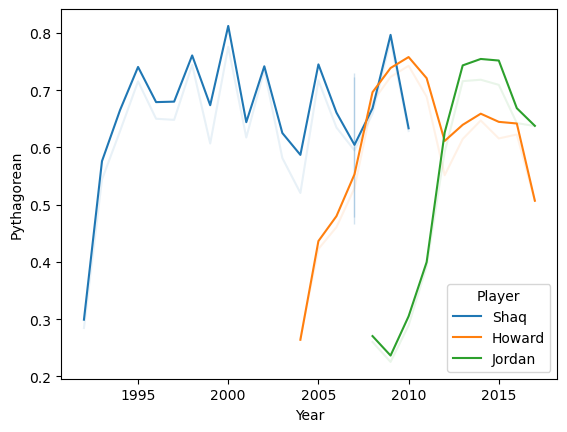

In [255]:
ax = sns.lineplot(x='Year', y='Pythagorean', hue='Player', data=combined, alpha=0.1, legend=False)
sns.lineplot(x='Year', y='Pythagorean_new', hue='Player', data=combined)


We can see that raising a players FT make percentage increases their pythagorean score.

## 2. Question
Following from our discussion of PER, not every free throw missed is rebounded by the other (defending team)—how would this affect the above calculations? Are missed free throws more or less costly in the real world than in the Pythagorean theory. See table at back of problem set for the live ball free throw rebound rate.

If every free throw missed is rebounded by the other team, then they become more costly. Or in other words they are helping the other team more. In terms of PER, players who rebound more shots have a higher PER in comparison to those who don't rebound as many. Similarly, those who miss more free throws have a lower PER then those who make more.

## 3. Question

At the end of a basketball game,  when a team is down between two to five points, announcers generally applaud the team for going for the assumed easier, “quick two”, instead of the riskier three-point shot.  This is especially common during March Madness. For commentator quotes from last year, without math, see: https://defector.com/when-do-you-need-a-three-in-the-ncaa-tournament-an-investigation. For this question, assume all twos are made with probability, p and all threes regardless of situation are made with probability, q.

A)	Assuming that you are down 2 points with under 5 seconds left and ignoring offensive rebounds, and assuming one wins in overtime 50 percent if the game is tied at the end of regulation and you are risk neutral. How much more frequently does a 2 point shot have to be made than a 3 point shot for the 2 point shot to be the right shot to take? 
How does this compare with the ratio from a league/time period of your choice? (2023 Ivy League Women’s Basketball for example.) Why might that estimate be bad for this scenario? Changing the estimates in a way you think more realistic, do you find a different optimal strategy?

Set up: Down 2 points. 50 % win overtime. How much more frequently does a 2 point shot have to be made than a 3point shot for the 2 point shot to be the right shot to take?

Two possibilities:
1. 2point shot -> equal score. OT -> winning chance 50%
2. 3point shot -> win

Let's consider the first
$Win = p*0.5$
Let's consider the second
$Win = q$
Setting those two equal to one another we get:
$q = 0.5p$ for winning

In order for a two shot to be worth as much as a three point shot it needs to be successful at twice the rate.

In the 2023 WNBA Season the Las Vegas Aces made 36.1% of their attempted three point shots, and their respective 2p stat had a make percentage of 73.5%. Indicating that a 2 point shot has to be made twice as frequently then a 3p shot.

B)	Now assume that you are down 3 points with under 20 seconds left and again ignoring offensive rebounds, and assuming one wins in overtime 50 percent of the time and is risk neutral. There is only time for you to have at most two possessions. Assume that the opposing teams shoots foul shots at the NBA league average rate from the spreadsheet. If you take and miss the two the game is over.  
To win if one shoots a two, you must:
make the two
then foul, the opposing team gets two foul shots, 
then make a three or two to send the game into overtime or win in regulation (depending on how many free throws were made). 

If you miss the three the game is over. If you make the three, the other team scores on the next possession and wins with probability 0.1.How much more frequently does a 2 point shot have to be made than a 3 point shot for the 2 point shot to be the right shot to take? 
How does this compare with the ratio from a league/time period of your choice? (2023 Ivy League Women’s Basketball for example.)

<hr size="10">

We denote $p$ as probability making two pointer, and $q$ probability three pointer. $a$ is the probability that the opponent scores the free throw.

3. Points
    1. Miss -> You lose
    2. Score(Tie) oponent scores with probability 0.1. Otherwise chance of winning 0.5%. Since overtime.
2. Points
    1. Win -> $a^2 * q$
    2. Win -> $2*((1-a) * a * q)$ Why two? Because there are two ways this could happen. The first is the opponent gets the first shot right, and misses the second or vice versa.
    3. Win -> $2*((1-a) * a * p)*0.5$ Same thing. Get's to overtime and then 0.5% chance winning
 
Now the question is how much more frequently does the 2point shot has to be made than the 3 point shot for the 2point shot to be the right one to make.

For the Three pointer to win one gets $q * 0.9 * 0.5 = 0.45q$

For the Two pointer to make sense vs the three pointer it needs to be bigger then $0.9q$
We formulate:

$P(Win|2p) = a^2 * q + 2*((1-a) * a * q) + 2*((1-a)* a * p)*0.5$

We can substitute in 0.75 for a as extracted from the data to get:

$P(Win|2p) = 0.75^2 * q + 2*(0.25 * 0.75 * q) + 2*(0.25 * 0.75 * p)*0.5$
$P(Win|2p) = 0.5625 * q + 0.375*q + 0.1875*p$

Now we test whether we should go for 2 or 3p:

$0.45q > 0.5625 * q + 0.375*q + 0.1875*p$

Simplifying results in: p < -0.2q for the equation to hold. We take the absolute value, and find that it does not hold that the make percentage is smaller then 0.2 the probability of making a three pointer. Hence, we go for 3. If the probability of making a two pointer is higher then q < 5p. Then we would go for a two pointer. 

C) How does the analysis in B) change if the other team has DeAndre Jordan on their team and you know, you can force him to take free throws in any scenario where the game is not over. A quick internet search shows that DeAndre Jordan's free throw make percentage is 0.475. So let's plug his numbers in and see:

$P(Win|2p) = a^2 * q + 2*((1-a) * a * q) + 2*((1-a)* a * p)*0.5$
We can plug in and simplify to get:
$P(Win|2p) = 0.225625q + 0.22325p$
$ 0.9q > 0.225625q + 0.22325p$

We obtain: $q > 0.33097p$

Meaning if the probability of making a three pointer is greater then $0.33097$ multiplied with the probability of a two pointer, then we should go for three. Otherwise, go for 2. Logically, 0.33097 is a small number so multiplying a 50% 2point make rate with it we get 0.1655 which is smaller then the three point make percentage average of the NBA which is 0.365. This somewhat makes intuitive sense, since we know that DeAndre Jordan is not the greatest free throw maker, we would imagine that knowing this fact should push is towards making a 2pointer.

D)

Finally, assume that you are down 4 points with under 20 seconds left and again ignoring offensive rebounds, and assuming one wins in overtime 50 percent of the time and is risk neutral. There is only time for you to have at most two possessions. Assume that the opposing teams shoots foul shots at the NBA league average rate from the spreadsheet. If you take and miss the two the game is over.  
To win if one shoots a two, you must:
make the two then foul and have the team miss one or two foul shots, then make a three or two to send the game into overtime or win in regulation (depending on how many free throws were made). 

If you miss the three the game is over. 
To win if one shoots a three, you must: make the three then foul and have the team take two two foul shots, then make a three or two to send the game into overtime or win in regulation (depending on how many free throws were made). 

How much more frequently does a 2 point shot have to be made than a 3 point shot for the 2 point shot to be the right shot to take? 
How does this compare with the ratio from a league/time period of your choice? (2023 Ivy League Women’s Basketball for example.)

We can see straight away that there are some combinations of winning that are exactly the same in either cases. Such as, throwing a three pointer first, opponent scores both, and then we make a 2 pointer. That is the same as two pointer first, opponent scores both, and we make a three pointer. We get this:

$P(Win|2p) = 2* (p * (1-a)*a *q)$
$P(Win|2p) = p * a^2 *q$
$P(Win|2p) = 2* (p * (1-a)*a *p) *0.5$

$P(Win|3p) = p * a^2 *q$
$P(Win|3p) = q^2 * a^2$
$P(Win|3p) = 2* (q * (1-a)*a *q)$
$P(Win|3p) = 2* (q * (1-a)*a *p)$

We can see that some things cancel out and so we get:

$q^2 * a^2 + 2* (q * (1-a)*a *q) = (p * (1-a) * a * p)$

We can plug in 0.475 for a and we get $q = 0.499110197p$ Hence if the probability of a three throw is as high as half the probability of a two pointer, then two two are equal. Therefore, a 2 pointer has to be made twice as often as a 3pointer for them to be equal.

E)    Given your results, what do you think of the announcers’ approach in general? Why do you think they might feel this way?!

In generall I think these results seem somewhat logical, but also counterintuitive. To the commentators, all that they might be thinking about is what can make the game as exciting as possible, and often times that is if the score is super close, and one move could turn it around. Therefore, announcers might be incentivized to keep it interesting and create a fantasy in which the score becomes super close and the other time might still have a shot at winning, just so that viewers stay engaged.